In [1]:
import tensorflow as tf
import numpy as np
import importlib.util
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_module(path):
    spec = importlib.util.spec_from_file_location("module.name", path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

def load_arch(arch_path):
    arch = load_module(arch_path)
    nn = arch.CNN()

    g = tf.Graph()
    with g.as_default():
        nn.create_architecture()
    return g, nn

In [3]:
graph, nn = load_arch("arch_invariant.py")

In [4]:
sess = tf.Session(graph=graph)

In [5]:
sess.run(tf.variables_initializer(graph.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)))

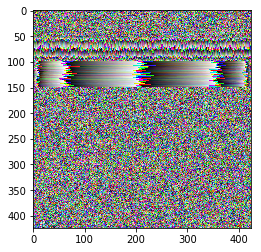

In [6]:
x = np.random.normal(size=(424, 424, 3))
x[50:100, :, :]  = np.sort(x[50:100, :, :], 0)
x[100:150, :, :] = np.sort(x[100:150, :, :], 1)
x[150:200, :, :] = np.sort(x[150:200, :, :], 2)
plt.imshow(x)

In [7]:
def dihedral(x, i):
    x = x.copy()
    if i & 4:
        x = np.transpose(x, (1, 0, 2))  # tau[4]
    if i & 1:
        x = x[:, ::-1, :]  # tau[1]
    if i & 2:
        x = x[::-1, :, :]  # tau[2]
    return x

In [8]:
xs = np.array([dihedral(x, i) for i in range(8)])

In [9]:
ps = sess.run(nn.tfp, feed_dict={nn.tfx: xs})
print(np.transpose(ps))

[[ 0.36373991  0.36374107  0.36373973  0.36373863  0.36374074  0.36374086
   0.36374238  0.36373961]
 [ 0.30093962  0.30093703  0.3009387   0.30093873  0.30093589  0.30093792
   0.30093545  0.30093902]
 [ 0.3353205   0.33532196  0.33532158  0.33532262  0.33532333  0.33532119
   0.3353222   0.3353214 ]
 [ 0.02513806  0.02513811  0.02513794  0.02513818  0.02513807  0.02513782
   0.02513828  0.02513839]
 [ 0.27580154  0.27579889  0.27580076  0.27580053  0.27579784  0.27580011
   0.27579719  0.27580065]
 [ 0.0633034   0.06330273  0.06330346  0.06330319  0.06330295  0.06330302
   0.06330202  0.06330305]
 [ 0.21249814  0.21249616  0.21249729  0.21249732  0.21249491  0.21249709
   0.21249516  0.21249759]
 [ 0.21479453  0.21479252  0.21479361  0.21479331  0.21479167  0.21479286
   0.21479049  0.21479374]
 [ 0.06100702  0.06100637  0.06100714  0.06100722  0.06100616  0.06100724
   0.06100671  0.06100691]
 [ 0.04128177  0.04128135  0.04128159  0.04128178  0.04128123  0.04128173
   0.04128107  0.

In [10]:
test = sess.run(nn.test, feed_dict={nn.tfx: xs})
test = np.reshape(test, (8, 8, -1))

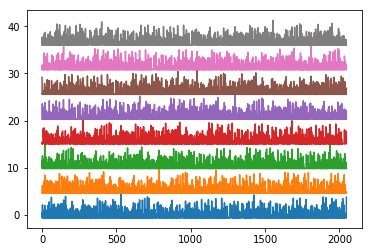

In [11]:
step = test[0].max() - test[0].min()
for i in range(8):
    plt.plot(test[i].flatten() + step * i)

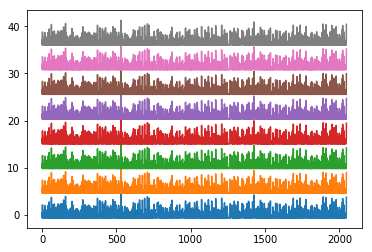

In [12]:
mt = np.array([ [0, 1, 2, 3, 4, 5, 6, 7], [1, 0, 3, 2, 5, 4, 7, 6],
                [2, 3, 0, 1, 6, 7, 4, 5], [3, 2, 1, 0, 7, 6, 5, 4],
                [4, 6, 5, 7, 0, 2, 1, 3], [5, 7, 4, 6, 1, 3, 0, 2],
                [6, 4, 7, 5, 2, 0, 3, 1], [7, 5, 6, 4, 3, 1, 2, 0]])
# tau[mt[a,b]] = tau[a] o tau[b]

iv = np.array([0, 1, 2, 3, 4, 6, 5, 7])
# tau[iv[a]] is the inverse of tau[a]

for i in range(8):
    plt.plot(test[i][mt[i]].flatten() + step * i)